# A Comparative Analysis of Machine Learning Algorithms for Anemia Classification


## Introduction


The notebook is based on the data from Kaggle, provided by the username Biswa Ranjan Rao, and the direct URL to the dataset is https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset.
The dataset consists of 1421 samples with six attributes: gender, hemoglobin, mean corpuscular hemoglobin (MCH), mean corpuscular hemoglobin concentration (MCHC), mean corpuscular volume (MCV), and result.

The result attribute(class), represented by the binary values 0 for non-anemic and 1 for anemic in the data set, was selected as the response variable. The gender attribute being binary, all other attributes were continuous variables, and the memory size consumed by the dataset was 66.7 MB.


* Objective: 
   - To build up the machine leanring model to classifiy anemic condition
   - To see if gender has an impact on hemoglobin levels  
   - Which algorithm would be best for detection

In [178]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy imbalanced-learn statsmodels streamlit

In [179]:
!jupyter --version
import sys
print("Python version:", sys.version)

Selected Jupyter core packages...
IPython          : 8.32.0
ipykernel        : 6.29.5
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : not installed
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3
Python version: 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:07:43) [MSC v.1942 64 bit (AMD64)]


In [180]:
# nhập các thư viện cần thiết

import pandas as pd # để thao tác và phân tích dữ liệu
import collections # để tạo và thao tác với các bộ sưu tập của Python như OrderedDict, defaultdict, Counter, v.v.
import numpy as np # cho tính toán khoa học với Python
import matplotlib.pyplot as plt # để trực quan hóa dữ liệu
%matplotlib inline
import seaborn as sns # cho trực quan hóa nâng cao

# Thư viện phân loại
from sklearn.linear_model import LogisticRegression # để triển khai thuật toán hồi quy logistic
from sklearn.tree import DecisionTreeClassifier # để triển khai thuật toán cây quyết định
from sklearn.ensemble import RandomForestClassifier # để triển khai thuật toán rừng ngẫu nhiên
from sklearn.svm import SVC # để triển khai thuật toán Máy Vector Hỗ trợ (SVM)
from sklearn.naive_bayes import GaussianNB # để triển khai thuật toán Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # để triển khai thuật toán K-Nearest Neighbors (KNN)

# Để kiểm tra thống kê
from scipy.stats import ttest_ind # để tính toán t-test cho hai mẫu độc lập
import statsmodels.api as sm # cho các mô hình và kiểm tra thống kê
from scipy.stats import chi2_contingency # để tính toán thống kê chi-square và p-value cho bảng dự phòng
import scipy.stats as stats # để triển khai độ lệch và các thống kê khác

# Các thư viện khác
# Các thư viện khác
from sklearn.model_selection import train_test_split # để chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.pipeline import make_pipeline # để xây dựng một pipeline của các biến đổi với một bộ ước lượng cuối cùng
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # để xây dựng một pipeline với các tập dữ liệu mất cân bằng
from imblearn.over_sampling import SMOTE # để tăng mẫu các tập dữ liệu mất cân bằng bằng cách sử dụng Kỹ thuật Tăng Mẫu Thiểu Số Tổng hợp (SMOTE)
from imblearn.under_sampling import NearMiss # để giảm mẫu các tập dữ liệu mất cân bằng bằng cách sử dụng thuật toán NearMiss
from imblearn.metrics import classification_report_imbalanced # để tạo báo cáo phân loại cho các tập dữ liệu mất cân bằng
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # để tính toán các chỉ số hiệu suất khác nhau cho các mô hình phân loại
from collections import Counter # để đếm tần suất của các phần tử trong một danh sách
from sklearn.model_selection import KFold, StratifiedKFold # để kiểm tra chéo k-fold
from sklearn.model_selection import cross_val_score # để đánh giá một mô hình bằng cách sử dụng kiểm tra chéo
from sklearn.metrics import cohen_kappa_score # để tính toán điểm kappa của Cohen cho sự đồng thuận giữa các đánh giá viên

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # để thiết lập số lượng cột tối đa hiển thị trong các dataframe của pandas


In [181]:

## đọc data
df= pd.read_csv('anemia data from Kaggle.csv')

# Exploratory Data Analysis

We need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.


In [182]:
df.shape

(1421, 6)

In [183]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Lets summarize the central tendency, dispersion and shape of dataset distribution

In [184]:
# Print summary statistics
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [185]:
#listing the data shape
df.shape

(1421, 6)

In [186]:
# the complete information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [187]:
#columns name
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [188]:
#Checking Null 
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(df.isnull().values.sum())

# Replace the ' 's with NaN
df = df.replace(" ",np.NaN)

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())



0
0



* Dataset contains 1421 records with 5 features
* Memory usages if 66.7KB whish is easy to process on local machine
* The data seems to  be clean with zero missing values
* 2 columns are int64 and rest are float 64


Now we will be creating the copy of data so that we avoid the mistake of modifying the data

The thus created data will mapped with naming convention so that we can easily visualize it:
* 0: 'Non Anemic'
* 1: 'Anemic'
    
similary, 
* 0: 'Male'
* 1: 'Female'
    
    

In [189]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

# Rename values in the 'Result' column just for the plot
df_copy['Result'] = df_copy['Result'].replace({0: 'Non Anemic', 1: 'Anemic'})
# Rename values in the 'Gender' column
df_copy['Gender'] = df_copy['Gender'].replace({0: 'Male', 1: 'Female'})


# Define custom hex colors
custom_colors = ['#B43757', '#a37b85']
custom_colors_gender = ['#90ADC6', '#C6A990']


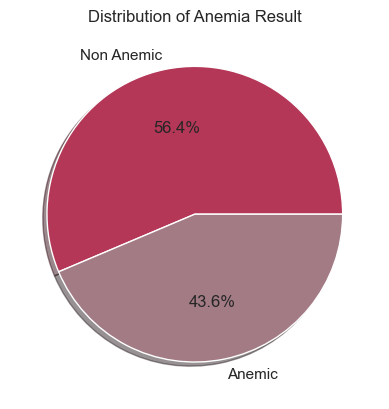

In [190]:
# Create a pie chart of the distribution of anemia result
result_counts = df_copy['Result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors, shadow=True)
plt.title('Distribution of Anemia Result')
plt.show()

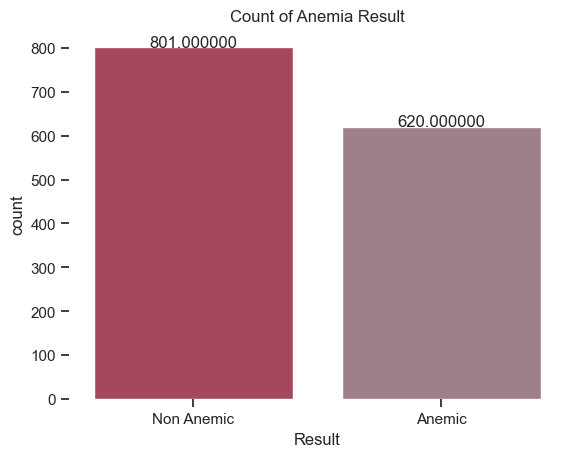

In [191]:
# Create a count plot of the anemia result
ax= sns.countplot(x='Result', data=df_copy,  palette=custom_colors)
plt.title('Count of Anemia Result')

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:f}'.format(p.get_height()), ha='center')
    
    
    
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

In [192]:
# Count the number of occurrences of each unique value in the 'Result' column
result_counts = df_copy['Result'].value_counts()

# Print the counts of the two categories
print(result_counts)

# Check if the two categories are balanced or not
if result_counts[0] == result_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
print("-----")    
# The classes are heavily skewed we need to solve this issue later.
print('Non Anemic', round(df['Result'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Anemic', round(df['Result'].value_counts()[1]/len(df) * 100,2), '% of the dataset')   
    

Result
Non Anemic    801
Anemic        620
Name: count, dtype: int64
The two categories are not balanced.
-----
Non Anemic 56.37 % of the dataset
Anemic 43.63 % of the dataset


Here we see the categories are not balanced and we need to address the class imbalance in our data before building a predictive model. 

Imbalanced classes can cause issues in machine learning models, as the model may be biased towards the majority class and may not perform well on the minority class.

Most of the class are non-Anemic. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most class are non anemic.


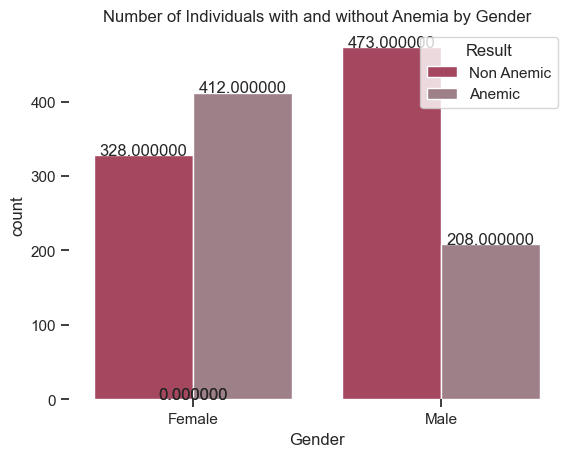

In [193]:
ax= sns.countplot(x='Gender', hue ='Result', data=df_copy, palette=custom_colors)
plt.title('Number of Individuals with and without Anemia by Gender')



# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:f}'.format(p.get_height()), ha='center')
    
    
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

There are 412 Female and 208 Male with Anemic

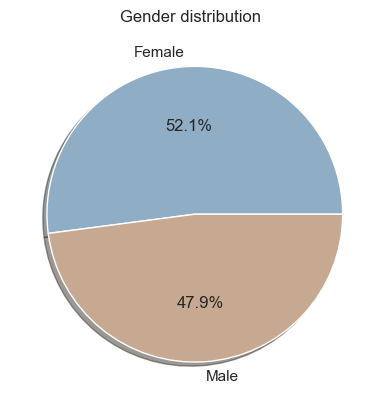

In [194]:
result_counts = df_copy['Gender'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors_gender, shadow=True)
plt.title('Gender distribution  ')
plt.show()

* Female participants constist of 4.2% more compared to male


In [195]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [196]:
df_copy.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Female,14.9,22.7,29.1,83.7,Non Anemic
1,Male,15.9,25.4,28.3,72.0,Non Anemic
2,Male,9.0,21.5,29.6,71.2,Anemic
3,Male,14.9,16.0,31.4,87.5,Non Anemic
4,Female,14.7,22.0,28.2,99.5,Non Anemic


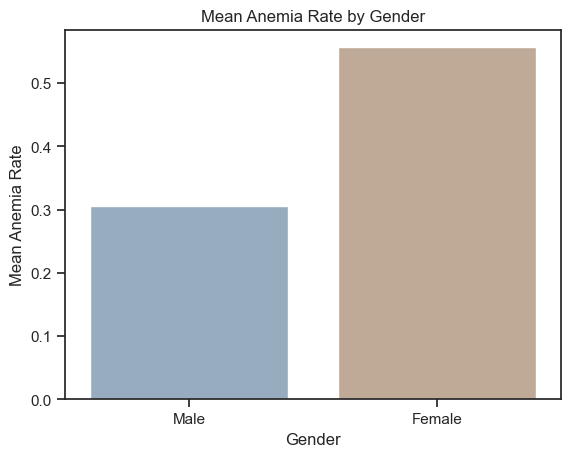

In [197]:
anemia_rates = df.groupby('Gender')['Result'].mean().reset_index()

ax = sns.barplot(x='Gender', y='Result', data=anemia_rates, palette=custom_colors_gender)
ax.set_xticklabels(['Male', 'Female'])
plt.title('Mean Anemia Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Anemia Rate')
plt.show()

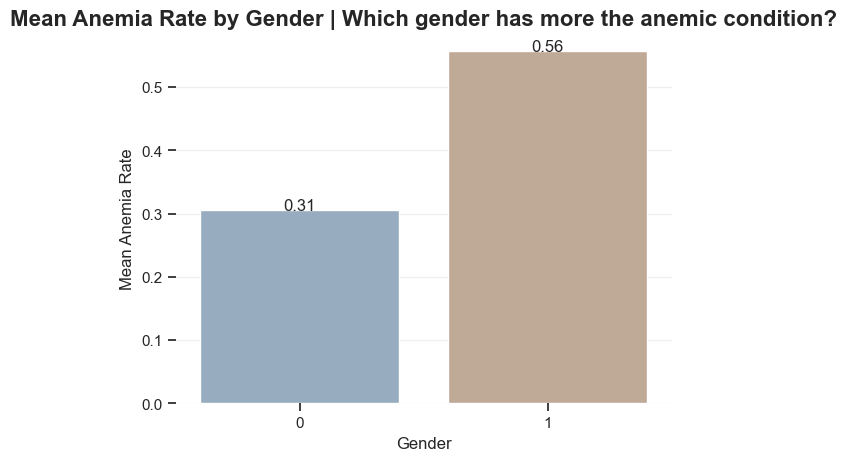

In [198]:
# Convert Gender column to string
anemia_rates['Gender'] = anemia_rates['Gender'].astype(str)

# Define the palette with string keys
color_gen = {'0': '#90ADC6', '1': '#C6A990'}

# Create the bar plot
ax = sns.barplot(x='Gender', y='Result', data=anemia_rates, palette=color_gen)

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')

# Add plot titles and labels
plt.title('Mean Anemia Rate by Gender | Which gender has more the anemic condition?', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Anemia Rate', fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

# Show the plot
plt.show()


In [199]:
anemia_rates = df.groupby('Gender')['Result'].mean().round(2)
anemia_rates

Gender
0    0.31
1    0.56
Name: Result, dtype: float64

 0 shows that the mean anemia rate for males is 0.31. This means that, on average, 31% of males in the dataset have anemia.

1 shows that the mean anemia rate for females is 0.56. This means that, on average, 56% of females in the dataset have anemia.

Therefore, the data suggests that females are more likely to have anemia than males in this dataset.

We should also be clear that, female population is 4.2% more than the male. 


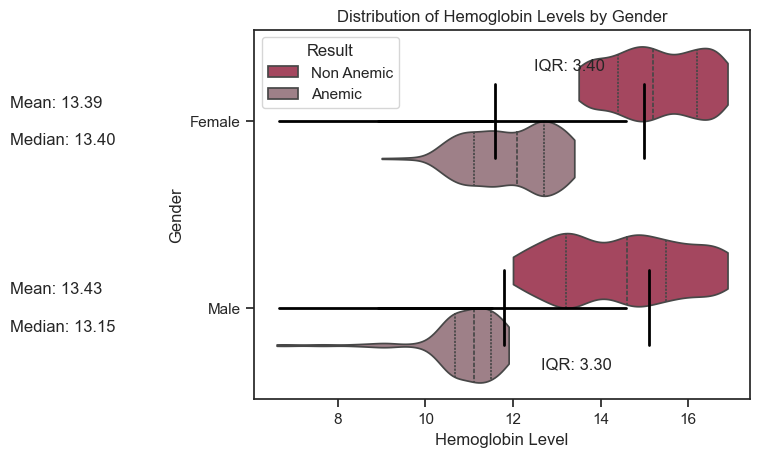

In [200]:
# Create separate subsets for males and females
male_data = df_copy[df_copy['Gender'] == 'Male']
female_data = df_copy[df_copy['Gender'] == 'Female']

# Plot horizontal violinplot using Seaborn
sns.violinplot(x='Hemoglobin', y='Gender', hue='Result', data=df_copy, palette=custom_colors, inner='quartile', scale='width', cut=0)

# Add mean and median lines
for i, group in enumerate([male_data, female_data]):
    median = group['Hemoglobin'].median()
    mean = group['Hemoglobin'].mean()
    plt.axhline(y=i, xmin=0.05, xmax=0.48, color='black', linewidth=2)
    plt.text(0.51, i+0.1, f'Median: {median:.2f}', ha='left', va='center')
    plt.text(0.51, i-0.1, f'Mean: {mean:.2f}', ha='left', va='center')

# Add IQR whiskers
q1_male, q3_male = male_data['Hemoglobin'].quantile([0.25, 0.75])
q1_female, q3_female = female_data['Hemoglobin'].quantile([0.25, 0.75])
plt.axhline(y=0, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.axhline(y=1, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.plot([q1_male, q1_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q3_male, q3_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q1_female, q1_female], [0.8, 1.2], color='black', linewidth=2)
plt.plot([q3_female, q3_female], [0.8, 1.2], color='black', linewidth=2)
plt.text((q1_male+q3_male)/2, -0.3, f'IQR: {q3_male-q1_male:.2f}', ha='center', va='center')
plt.text((q1_female+q3_female)/2, 1.3, f'IQR: {q3_female-q1_female:.2f}', ha='center', va='center')



# Add title and labels
plt.title('Distribution of Hemoglobin Levels by Gender')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Gender')


# Show the plot
plt.show()


Shows density of your data in addition to the center, spread, and any outliers that may be present. 

Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

The median Hemoglobin level for female with anemic is around 12 and for male is 11.

We see the Mean is higher than median for Male becuase distrubution is moving  left tail. 

We see the genderwise distribution fot Anemic and Non Anemic is not same. 






### Distribution of Hemoglobin

Hemoglobin is the protein in your red blood cells that transports oxygen to the tissues of your body

The normal hemoglobin range is generally defined as 
 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 
 11.6 to 15 g/dL for women.
 
**Freedman-Diaconis rule**  

The rule takes into account the spread of the data and the sample size, and is intended to give a reasonable balance between the level of detail in the histogram and the ability to discern patterns in the data for creating bin size.

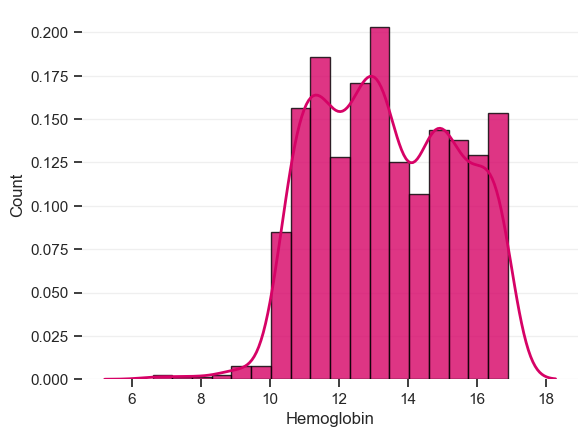

<Figure size 800x600 with 0 Axes>

In [201]:
iqr = np.percentile(df['Hemoglobin'], 75) - np.percentile(df['Hemoglobin'], 25)

# Bin width using the Freedman-Diaconis rule 
bin_width = 2 * iqr / (len(df)**(1/3))
                       
                       


sns.distplot(df['Hemoglobin'], hist=True, kde=True, 
             bins=int(round((df['Hemoglobin'].max() - df['Hemoglobin'].min()) / bin_width)),
             color='#d60266',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})

# Add labels and adjust font sizes
#plt.title('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
plt.xlabel('Hemoglobin', fontsize=12)
plt.ylabel('Count', fontsize=12)

# # Add legend
# plt.legend(labels=['Hemoglobin'], loc='upper right')

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)


# Adjust plot size
plt.figure(figsize=(8, 6))
# Show plot
plt.show()




We see the value of Hemoglobin is maximum at 13 and the hemoglobin is left skewed as longer on the left side of its peak. 

Left skew: mean < median

In [202]:
# Calculate skewness using the skew() function
skewness = stats.skew(df['Hemoglobin'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df['Hemoglobin'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

Skewness: 0.022721507912660675
Kurtosis: 2.1042580924983616


Presence of slightly negative skewness

In [203]:
# Create a dictionary with the values
hemoglobin_data = {'Metric': ['Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
                   'Value': [df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

# Create a pandas DataFrame from the dictionary
hemoglobin_table = pd.DataFrame(hemoglobin_data)

# Create the table using Seaborn styling
styled_table = (hemoglobin_table.style
                .set_caption('Hemoglobin Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)


,Metric,Value
0,Highest Hemoglobin Level,16.90
1,Average Hemoglobin Level,13.41
2,Lowest Hemoglobin Level,6.60


 Lower than normal hemoglobin levels indicate anemia. 
 The normal hemoglobin range is generally defined as 
 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 
 11.6 to 15 g/dL for women.
 
 
* men < 13.2 g/dL is low,
* women, a< 11.6 g/dL is  low. 

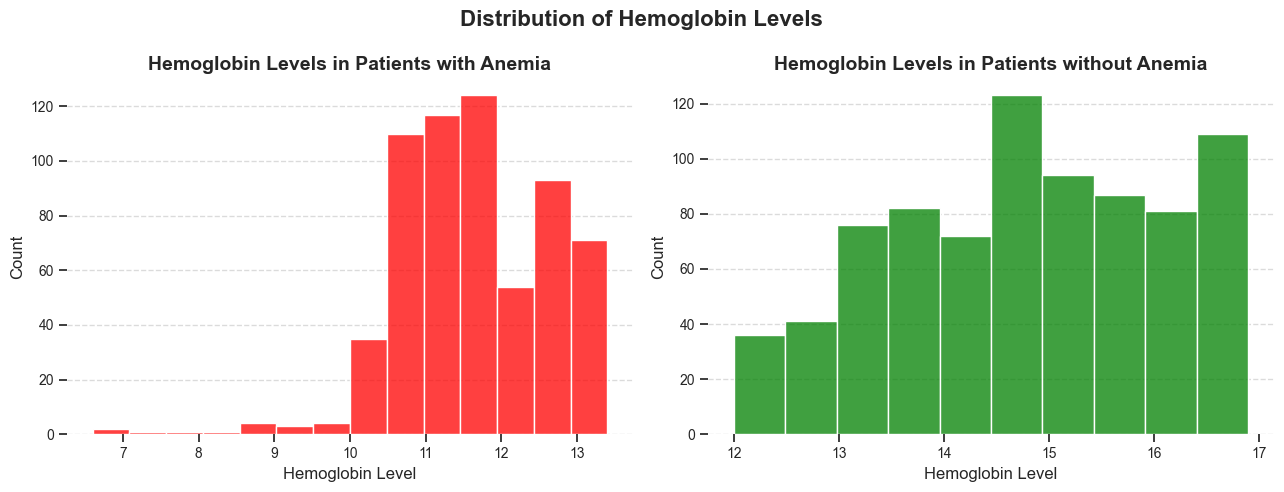

In [204]:
# Filter the data by anemia status
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='Hemoglobin', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='Hemoglobin', ax=ax2, color='green',  binwidth=0.5)

# Set titles and axis labels
ax1.set_title('Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# # Add legend
# ax1.legend(labels=['Patients with Anemia'], loc='upper right', fontsize=10)
# ax2.legend(labels=['Patients without Anemia'], loc='upper right', fontsize=10)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


We see that Haemoglobin level of pateinces with Anemia is showing left skewed. The people with Hgb level in the range 11-12 are more and without anemia is 14-15

### MCH

MCH stands for “mean corpuscular hemoglobin.” 
An MCH value refers to the average quantity of hemoglobin present in a single red blood cell. 

It is usually reported as part of a complete blood count (CBC). An MCH level that is too high or too low can be a sign of an underlying health condition.


>normal range of Mean Corpuscular Hemoglobin (MCH) is typically between 27 and 33 picograms (pg) per red blood cell

In [205]:
# Create a dictionary with the values mean corpuscular hemoglobin MCH
MCH_data = {'Metric': ['Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level'],
                   'Value': [df['MCH'].max(), df['MCH'].mean(), df['MCH'].min()]}

# Create a pandas DataFrame from the dictionary
MCH_table = pd.DataFrame(MCH_data)

# Create the table using Seaborn styling
styled_table = (MCH_table.style
                .set_caption('MCH Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

,Metric,Value
0,Highest MCH Level,30.00
1,Average MCH Level,22.91
2,Lowest MCH Level,16.00


The highest MCH level in this table is 30.00, which indicates that some red blood cells have a higher than normal amount of hemoglobin. This could be due to various reasons such as vitamin deficiencies, liver disease, or alcoholism.

The average MCH level in this table is 22.91, which is within the normal range ( 27 - 33 Pg per red blood cell)

The lowest MCH level in this table is 16.00, which indicates that some red blood cells have a lower than normal amount of hemoglobin. This could be due to conditions such as iron-deficiency anemia, thalassemia (low MCH can also be caused by other factors such as thalassemia, a genetic disorder that affects the production of hemoglobin.), or chronic kidney disease

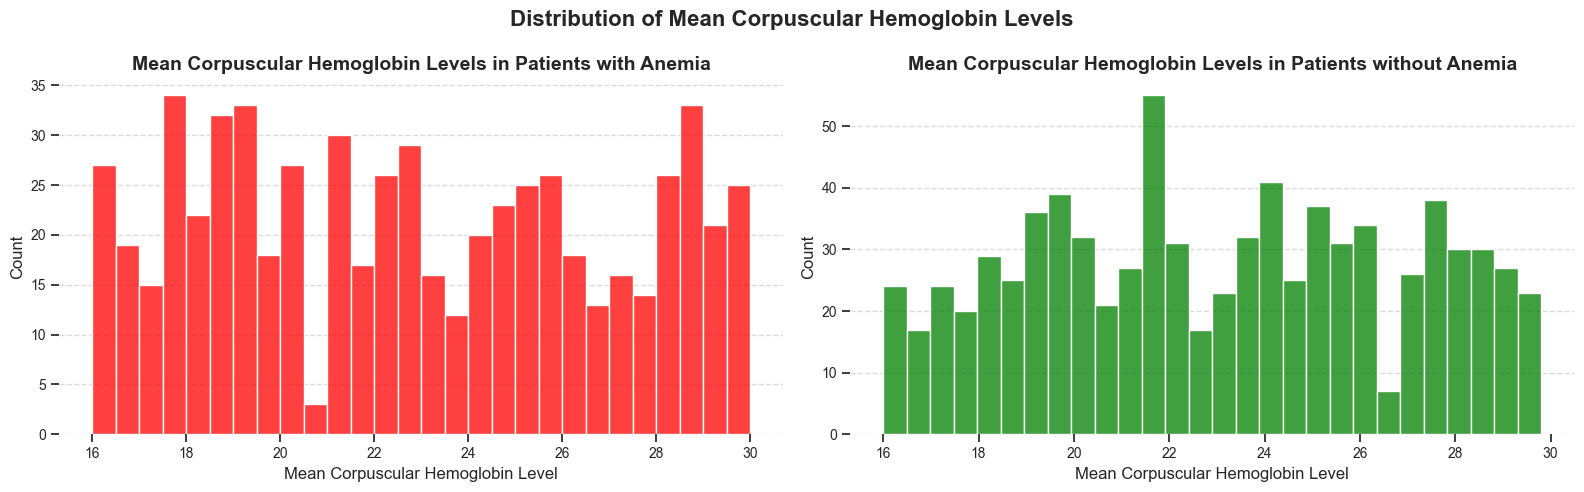

In [206]:
# Filter the data by anemia status
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='MCH', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='MCH', ax=ax2, color='green',  binwidth=0.5)

# Set titles and axis labels
ax1.set_title('Mean Corpuscular Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Mean Corpuscular Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Mean Corpuscular Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# # Add legend
# ax1.legend(labels=['Patients with Anemia'], loc='upper right', fontsize=10)
# ax2.legend(labels=['Patients without Anemia'], loc='upper right', fontsize=10)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()

### MCHC (Mean Corpuscular Hemoglobin Concentration)

It represents the average weight of hemoglobin in a given volume of packed red blood cells. MCHC is expressed in grams per deciliter (g/dL).


normal range of MCHC is typically between 32 and 36 g/dL

A low MCHC value indicates hypochromic red blood cells, which means that the cells have less hemoglobin than normal, while a high MCHC value indicates hyperchromic red blood cells, which means that the cells have more hemoglobin than normal. MCHC is used along with other blood tests to diagnose anemia and to monitor response to treatment.

In [207]:
# Create a dictionary with the values mean corpuscular hemoglobin MCH
MCHC_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level'],
                   'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min()]}

# Create a pandas DataFrame from the dictionary
MCHC_table = pd.DataFrame(MCHC_data)

# Create the table using Seaborn styling
styled_table = (MCHC_table.style
                .set_caption('MCHC Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80


In the given values, the highest MCHC level is 32.5,
the average MCHC level is 30.25, and the lowest MCHC level is 27.8.


The highest MCHC level is 32.5%, which means that the concentration of hemoglobin in the red blood cells is relatively high. The average MCHC level is 30.25%, which is a typical value for MCHC in healthy individuals. The lowest MCHC level is 27.8%, which means that the concentration of hemoglobin in the red blood cells is relatively low. However, it is important to note that the interpretation of MCHC levels should be done in the context of other factors such as MCV (mean corpuscular volume), RDW (red cell distribution width), and hemoglobin levels to determine if there is an underlying health condition such as anemia or a nutritional deficiency.



MCHC is expressed as a percentage (%) representing the concentration of hemoglobin in a given volume of packed red blood cells. 

It is calculated by dividing the amount of hemoglobin by the volume of packed red blood cells. 

The use of percentages makes it easier to compare MCHC values across different populations and to interpret the results.




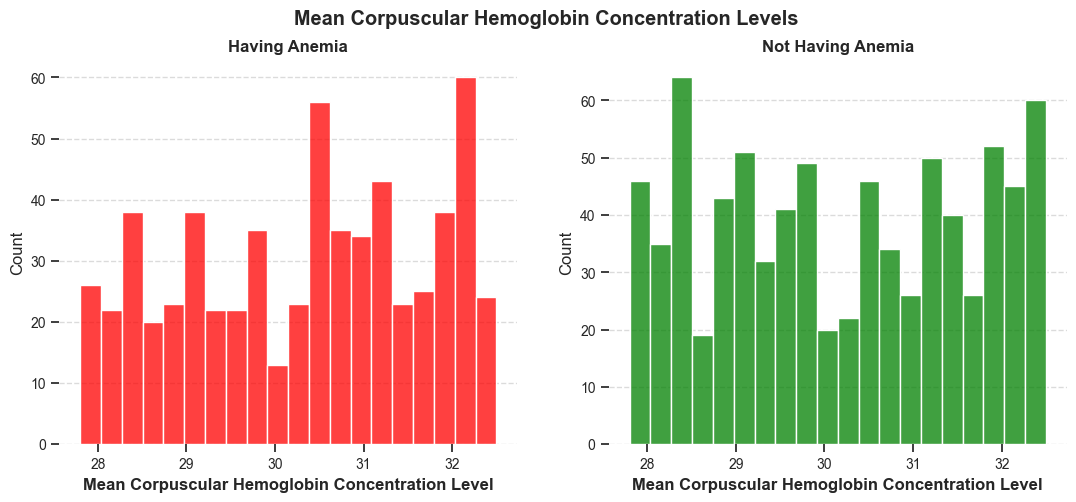

In [208]:
# Filter data for anemia and non-anemia cases
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='MCHC', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCHC', ax=ax2, color='green', bins=20)


# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)



# Set titles and axis labels
ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia', fontweight='bold')
fig.suptitle('Mean Corpuscular Hemoglobin Concentration Levels', fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


### MCV (Mean Corpuscular Volume)

is a measure of the average volume of a red blood cell. It is calculated by dividing the total volume of red blood cells by the total number of red blood cells in a sample of blood. MCV is reported in femtoliters (fL).

The normal range for MCV is typically between 80 to 100 femtoliters (fL).

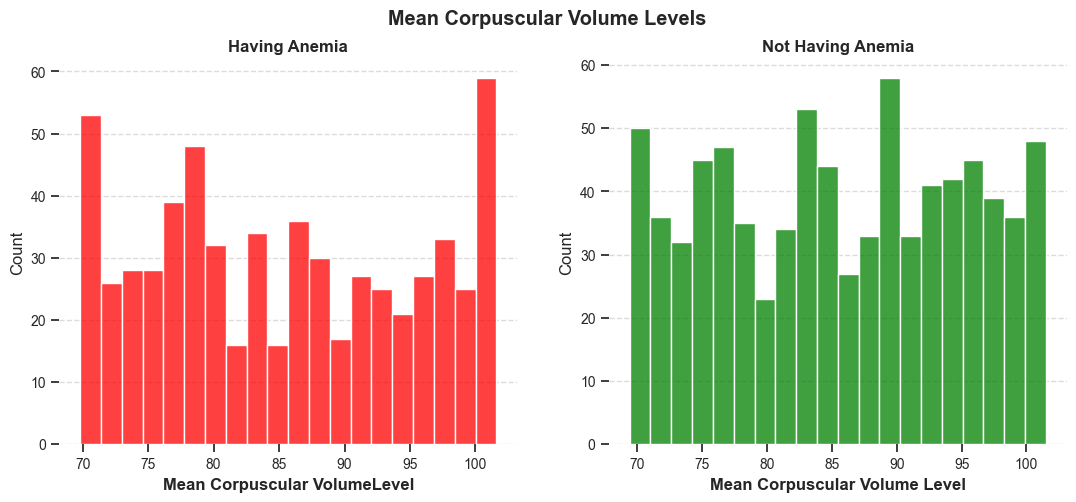

In [209]:
# Filter data for anemia and non-anemia cases
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='MCV', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCV', ax=ax2, color='green', bins=20)


# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)



# Set titles and axis labels
ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia',fontweight='bold' )
fig.suptitle('Mean Corpuscular Volume Levels',fontweight='bold')
ax1.set_xlabel('Mean Corpuscular VolumeLevel',fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Volume Level',fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

In [210]:
# Create a dictionary with the values mean corpuscular hemoglobin MCH
MCV_data = {'Metric': ['Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level'],
                   'Value': [df['MCV'].max(), df['MCV'].mean(), df['MCV'].min()]}

# Create a pandas DataFrame from the dictionary
MCV_table = pd.DataFrame(MCV_data)

# Create the table using Seaborn styling
styled_table = (MCV_table.style
                .set_caption('MCV Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

,Metric,Value
0,Highest MCV Level,101.60
1,Average MCV Level,85.52
2,Lowest MCV Level,69.40


Highest MCV level is slightly above the normal range, while the lowest MCV level is below the normal range. The average MCV level is within the normal range.

Important to note that the interpretation of MCV levels should always be done in the context of the individual's overall health and medical history, and a healthcare professional should be consulted for any concerns or abnormalities.

###  Hemoglobin, MCH, MCHC, MCV highest, lowest and average value


In [211]:
# dictionary with the values for MCHC, MCV, MCH, and hemoglobin
blood_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level',
                         'Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level',
                         'Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level',
                         'Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
              'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min(),
                        df['MCV'].max(), df['MCV'].mean(), df['MCV'].min(),
                        df['MCH'].max(), df['MCH'].mean(), df['MCH'].min(),
                        df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

# Create a pandas df
blood_table = pd.DataFrame(blood_data)

# Create the table 
styled_table = (blood_table.style
                .set_caption('Blood Test Results')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',                                    'props': [('font-size', '18px'),                                              ('font-weight', 'bold'),                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)


,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80
3,Highest MCV Level,101.60
4,Average MCV Level,85.52
5,Lowest MCV Level,69.40
6,Highest MCH Level,30.00
7,Average MCH Level,22.91
8,Lowest MCH Level,16.00
9,Highest Hemoglobin Level,16.90


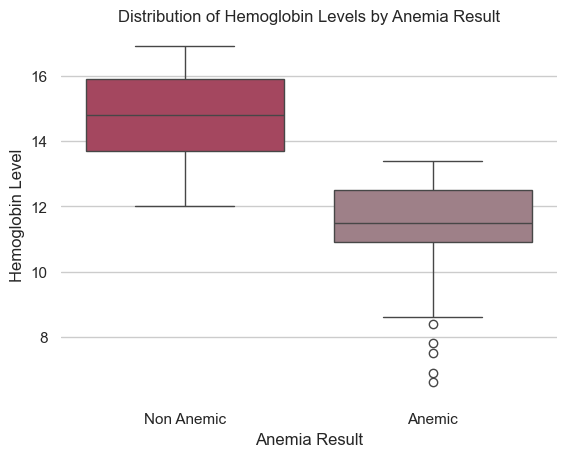

In [212]:
sns.set_style("whitegrid")
sns.boxplot(x='Result', y='Hemoglobin', data=df_copy, palette=custom_colors)
plt.title('Distribution of Hemoglobin Levels by Anemia Result')
plt.xlabel('Anemia Result')
plt.ylabel('Hemoglobin Level')



# Remove spines
sns.despine(left=True, bottom=True)
plt.show()


* The longer the box, the more dispersed the data - Non anemic have more disperesed data.
* Median line of a box plot lies outside of the box of a each other, there is likely to be a difference between the two groups.
* For anemic we see data point that is located outside the whiskers of the box plot thus presence of outlier.


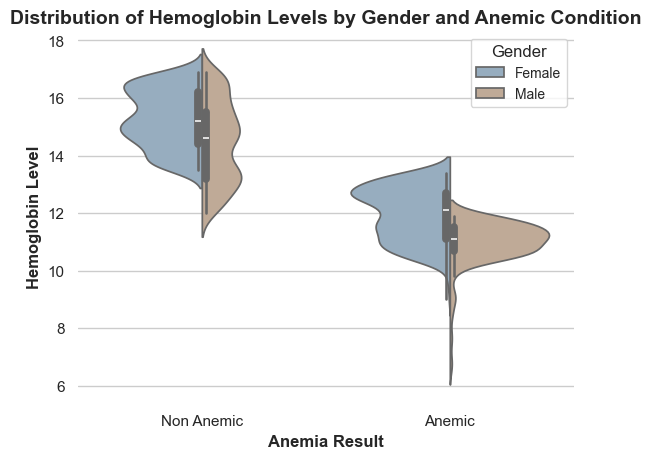

In [213]:
# Set plot style


# Create violin plot using Seaborn
ax = sns.violinplot(x='Result', y='Hemoglobin', hue='Gender', data=df_copy, palette=custom_colors_gender, split=True)

# Set plot title and axis labels
ax.set_title('Distribution of Hemoglobin Levels by Gender and Anemic Condition', fontsize=14, fontweight='bold')
ax.set_xlabel('Anemia Result', fontsize=12, fontweight='bold')
ax.set_ylabel('Hemoglobin Level', fontsize=12, fontweight='bold')

# Add legend and adjust its position
ax.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


Here,
* The white dot inside each violin represents the median value of the data.
(We see medin of non anemic is higher than anemic)

* The thick black line inside each violin represents the interquartile range (IQR) of the data, which contains the middle 50% of the data. (Non anemic have thicker lines)

* The thin black lines, or "whiskers," that extend from the violins represent the range of the data, excluding any outliers.( more extended for anemic)

* The width of the violin at each value represents the probability density of the data at that value. Wider sections of the violin indicate that more data points are clustered around that value.

* We see male in Anemic have symmetric and bell-shaped which indicates that the data is normally distributed.For rest we see as multiple peaks, this indicates that the data is non-normal.

* we see bimodal distribution for. 



In [214]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

----------

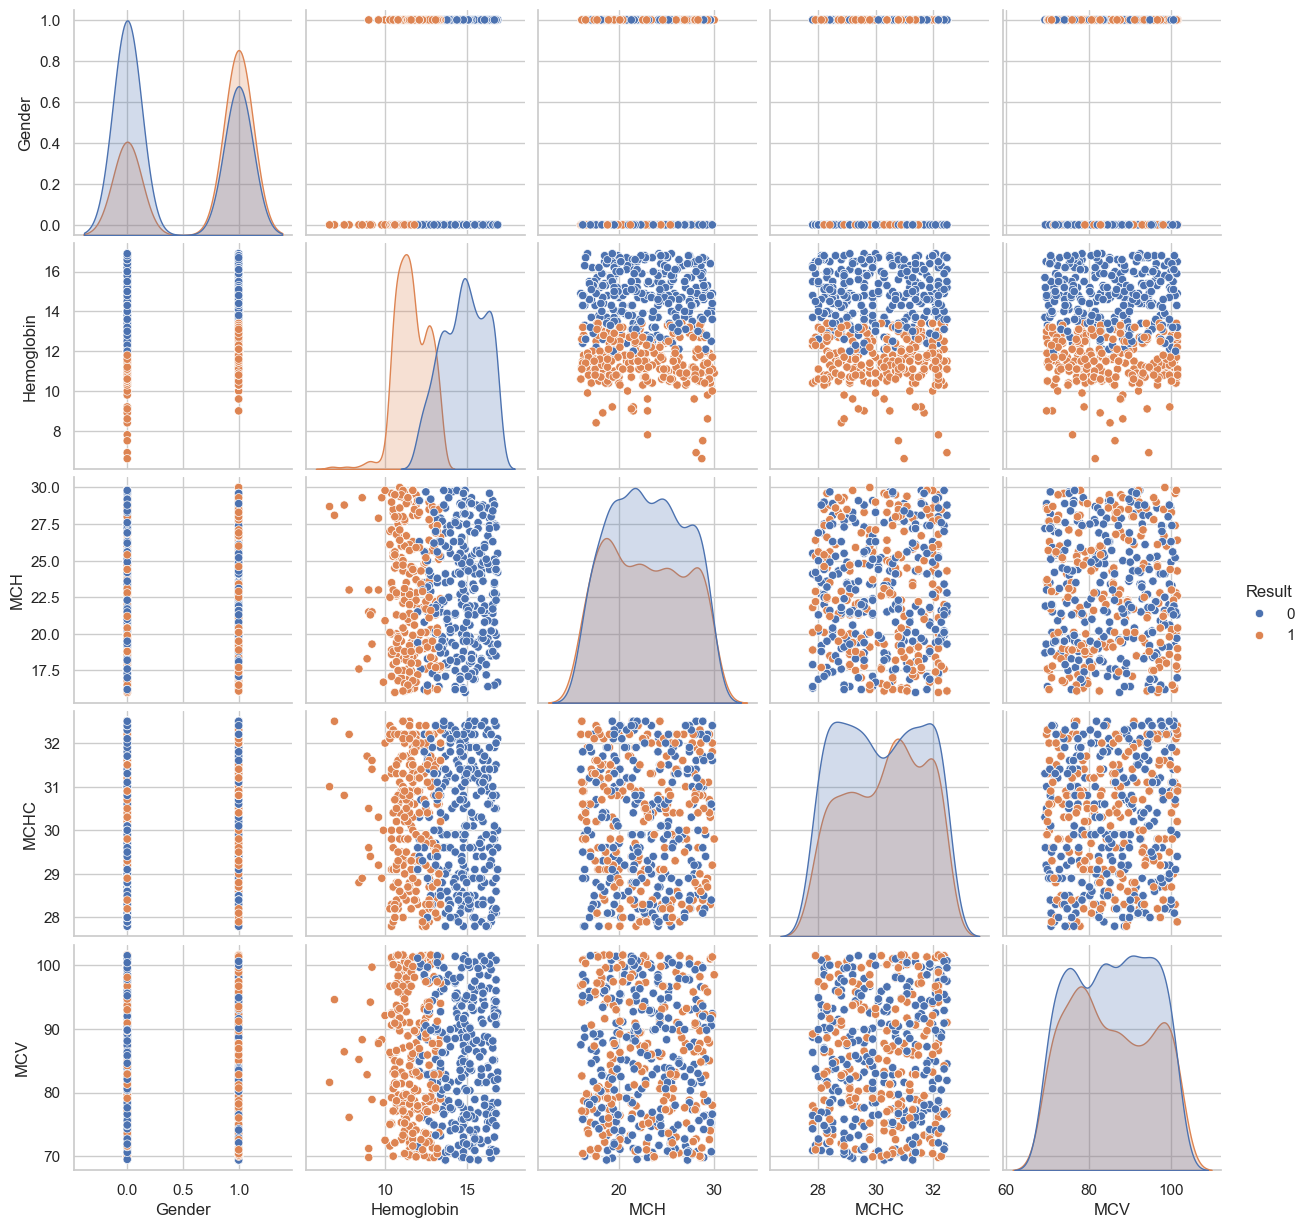

In [215]:
sns.pairplot(df,hue='Result')

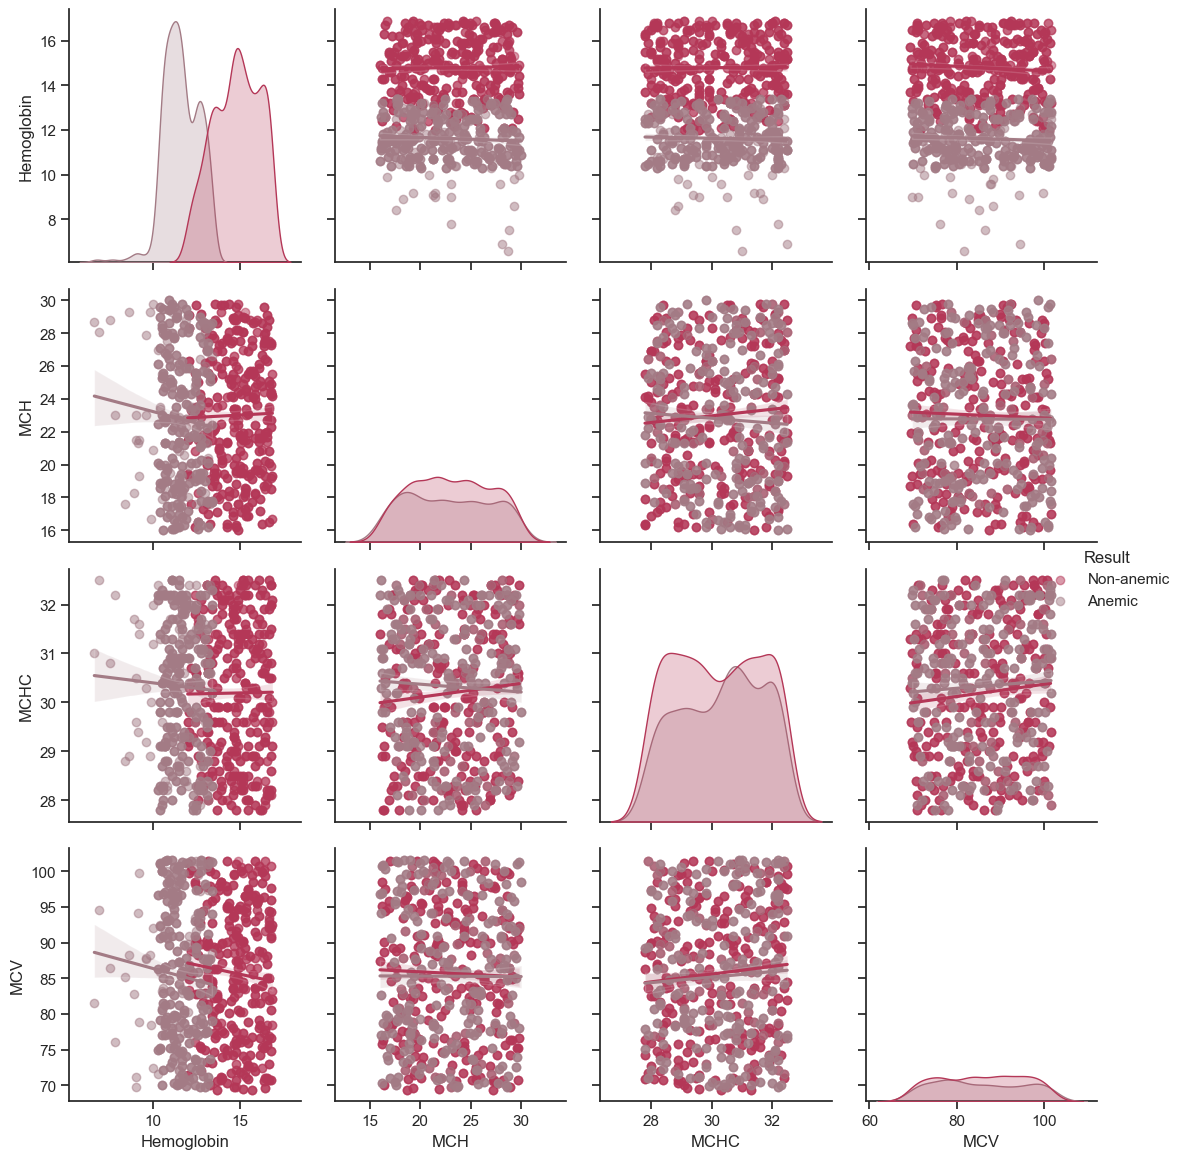

In [216]:
sns.set(style="ticks")

RELATIONS_COLS = ["Hemoglobin", "MCH", "MCHC","MCV"]

g = sns.PairGrid(data=df, vars=RELATIONS_COLS, hue="Result", palette=custom_colors)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.regplot, scatter_kws={'alpha':0.5})
g.add_legend(title="Result")
legend = g._legend

# set figure size
g.fig.set_size_inches(12, 12)

# update legend labels
new_labels = ['Non-anemic', 'Anemic']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


# legend.texts[0].set_text('Non Anemic')
# legend.texts[1].set_text('Anemic')
# g.fig.suptitle("Relations in the Dataset", y=1.03)

Pairplots shows tha relationship and we see Hemoglobin is kind of constant slope with other variable for both anemic and non anemic data.


---

# Statistical test

## t-test 

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups. In our case, we are using a t-test to determine whether there is a significant difference in the mean hemoglobin levels between males and females.

As we see Hemoglobin have negaive skewness but t-test asumes have normal distribution. So before performing t-test, we  would be taking the logarithm of the data, which can help to reduce the skewness. 


In [217]:
df_stat = df.copy()
df_stat.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [218]:

# Separate the hemoglobin data by gender
male_hemoglobin = df_stat.loc[df_stat['Gender'] == 0, 'Hemoglobin']
female_hemoglobin = df_stat.loc[df_stat['Gender'] == 1, 'Hemoglobin']

# Compute the t-test statistic and p-value
t_statistic, p_value = ttest_ind(male_hemoglobin, female_hemoglobin)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on hemoglobin levels.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.")


T-Statistic: -0.41
P-Value: 0.679
Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.


t-statistic is negative, it suggests that the mean hemoglobin level for males is slightly lower than the mean hemoglobin level for females, but the difference is not large.

P value is greater than the significance level of 0.05 so fail to reject null hypothesis.

Thus, we can conclude that there is not enough evidence to support the claim that gender has an impact on hemoglobin levels.

## Odd Ratio

Odds ratio is a measure of the strength of association between two variables. We are looking for gender and Anemic condition(Result). The odds ratio tells us the odds of having anemia for females relative to males. 

An odds ratio greater than 1 indicates that the odds of having anemia are higher for females, while an odds ratio less than 1 indicates that the odds of having anemia are higher for males.
 


In [219]:

# Create binary variables for gender and anemia status
df_stat['is_female'] = np.where(df_stat['Gender'] == 1, 1, 0)
df_stat['is_anemic'] = np.where(df_stat['Result'] == 1, 1, 0)

# Fit a logistic regression model with gender and anemia status as predictors
logit_model = sm.Logit(df_stat['is_anemic'], sm.add_constant(df_stat['is_female']))
result = logit_model.fit()

# Print the odds ratio for gender
print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.652524
         Iterations 5
Odds Ratio for Gender: 2.86


Logistic regression model converged successfully with 5 iterations, and the odds ratio for gender is 2.86.

An odds ratio of 2.86 means that females have 2.86 times the odds of being anemic compared to males. This indicates that being female is associated with a higher risk of anemia compared to being male, assuming that other factors in the model are held constant.

# Chi-square test

Dhi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. In this case, we are using the chi-square test to determine whether there is a significant association between gender and anemia status.




In [220]:

# Create a contingency table of gender and anemia status
cont_table = pd.crosstab(df_stat['Gender'], df_stat['Result'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender and anemia status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and anemia status are independent.")


Chi-Square Statistic: 90.06
P-Value: 0.000
Reject null hypothesis: Gender and anemia status are dependent.


The chi-square statistic is 90.06 and the p-value is less than 0.001.

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis that gender and anemia status are independent, and conclude that there is evidence of a relationship between gender and anemia status.



-----

# Feature Selection


With the goal of improving model's performance and interpretability by reducing the number of not important attributes used in the model is termed as feature selection. In supervised methods the feature selecction methoeds are divided into wrapper, filter and intrinsic. The study incorporated correlation, SelectKBest and Extra Tree Classifier.

## Correlation
 Pearson correlation matrixis is used.


In [221]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

Here if we see, MCV, MCG and Hemoglobin have negative correlation with Result column

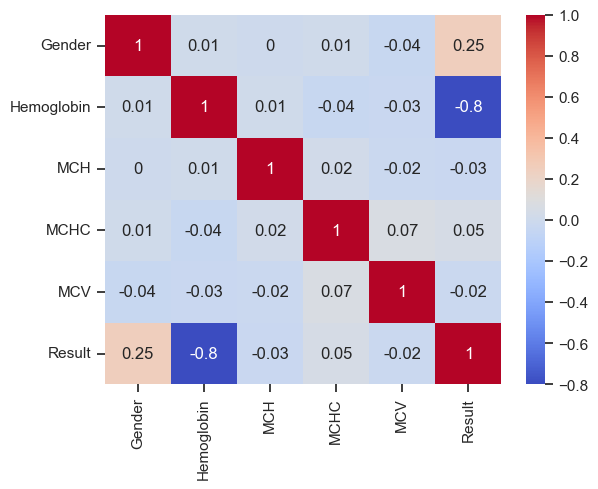

In [222]:

# create a correlation matrix
corr_matrix = df.corr().round(2)

# plot the correlation matrix using a heatmap from seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
plt.show()


The correlation coefficient between gender and hemoglobin is 0.01, indicating a weak positive correlation. This means that there is a slightly higher tendency for one gender to have slightly higher hemoglobin levels than the other, but the correlation is not strong.

The correlation coefficient between result and gender is 0.25, indicating a weak positive correlation. This means that there is a slightly higher tendency for one gender to have slightly higher prevalence of anemia than the other, but the correlation is not strong.

The correlation coefficient between hemoglobin and result is -0.8, indicating a strong negative correlation. This means that as hemoglobin levels decrease, the likelihood of anemia increases. This is an expected result, as anemia is defined by low hemoglobin levels.

## SelectKBest

To validate the outcome of the correlation matrix, statistical method known as univariate selection using the SelectKBest method was used to select the top 3 features. SelectKBest uses Chi-squared as scoring functions i.e., tests whether the occurrences of a specific feature and a specific class are independent using their frequency distribution. 

When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate
Each feature has its test score. Finally, all the test scores are compared, and the features with top scores will be selected.

In [223]:
import numpy as np
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = df.iloc[:,0:5]  # independent columns
y = df.iloc[:,5] 

k_values = [2, 3, 4, 5]  # different values of K to try
best_k = 0  # variable to keep track of best K value
best_score = 0  # variable to keep track of best score

for k in k_values:
    # apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_) # score for each feature
    dfcolumns = pd.DataFrame(X.columns)

    # concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs','Score']  # naming the dataframe columns

    # get the best K value based on score
    if featureScores['Score'].sum() > best_score:
        best_score = featureScores['Score'].sum()
        best_k = k

print(f"The best value of K is {best_k} with score {best_score}.")

print("---")
print(featureScores)
print("---")
print(featureScores.nlargest(3,'Score'))  #print 2 best features

The best value of K is 2 with score 307.0244798773883.
---
        Specs       Score
0      Gender   43.648385
1  Hemoglobin  261.707512
2         MCH    0.803292
3        MCHC    0.212839
4         MCV    0.652452
---
        Specs       Score
1  Hemoglobin  261.707512
0      Gender   43.648385
2         MCH    0.803292


# For Cross Validation for feature selection we use "Feature Importance"  
    You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 3 features for the dataset.


Notice that in an Extra Trees classifier, the features and splits are selected at random; hence, “Extremely Randomized Tree”. Since splits are chosen at random for each feature in the Extra Trees Classifier, it’s less computationally expensive than a Random Forest.

# Extremely Randomized Trees.

In [224]:
# Extremely Randomized Trees.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [225]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08061716 0.75050658 0.05868968 0.05099828 0.0591883 ]


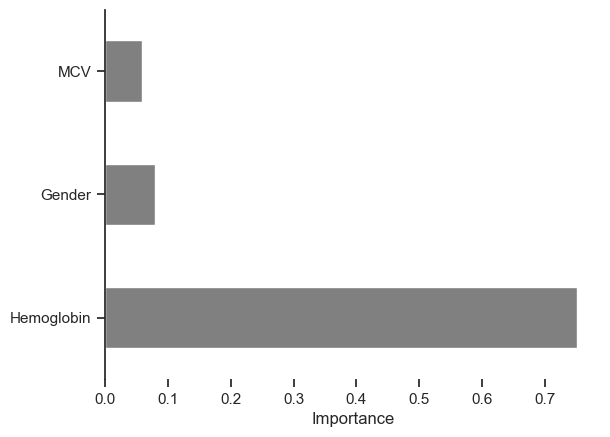

<Figure size 640x480 with 0 Axes>

In [226]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(3).plot(kind='barh', color='#808080')
plt.xlabel('Importance')
# plt.title('Top 3 Features Importance', fontweight='bold', fontsize=12)
# Remove spines
sns.despine(left=False, bottom=True)
plt.show()
plt.savefig('Top2Feature.jpg')

So from both Anova and Extra three Hemoglobin, Gender and MCV are important feature. So we will be using these feature for our model.

Now we know these 2 are the best features for the model.


----

# Scaling  Features
To ensure that features with lesser significance do not dominate the objective function, you can use feature scaling techniques. One commonly used technique is standardization or normalization.

Standardization involves transforming the feature values so that they have a mean of zero and a standard deviation of one. This is achieved by subtracting the mean from each value and dividing by the standard deviation. This method ensures that all features have the same scale and do not dominate the objective function.

Normalization, on the other hand, involves scaling the feature values to a range between 0 and 1. This is achieved by subtracting the minimum value from each value and dividing by the range (maximum value - minimum value). This method is useful when the distribution of the feature values is not normal.


In [227]:
# Scale Hemoglobin by log
df['Hemoglobin_log'] = np.log(df.Hemoglobin + 0.01)

Here we take the logarithm of a variable as it has a skewed distribution or contains extreme values. 

By taking the logarithm, the range of the variable is compressed and extreme values are down-weighted, which can help to reduce the impact of outliers on the analysis.

Note that adding a small constant (0.01 in this case) is a common practice to avoid taking the logarithm of zero or negative values. The value chosen for the constant should be small enough to not significantly affect the distribution of the data, but large enough to avoid taking the logarithm of zero or negative values.

# Scale Hemoglobin by Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [228]:
# Scale Hemoglobin by Standardization
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['Hemoglobin_scaled'] = ss.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

# Scale Hemoglobin by Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.



In [229]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['Hemoglobin_minmax'] = mm.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

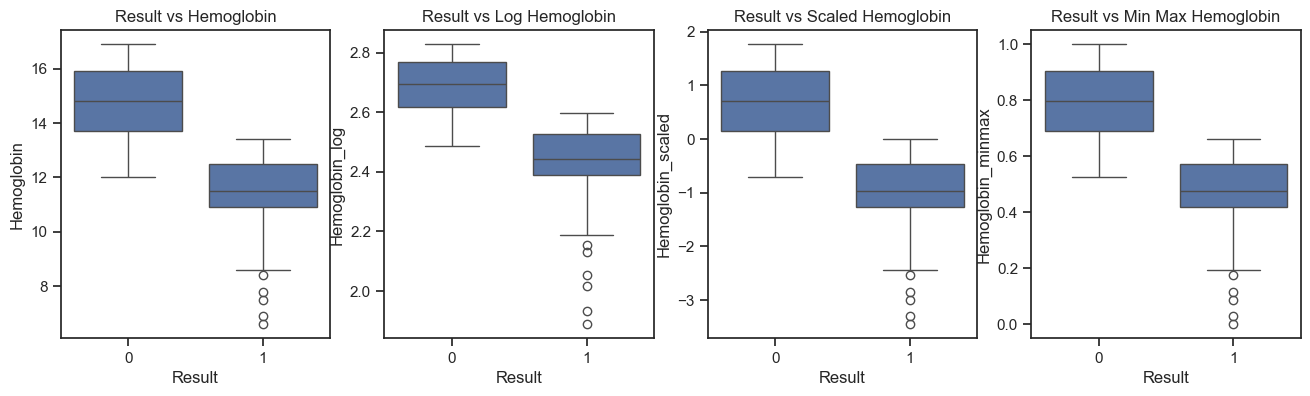

In [230]:
#Feature engineering to a better visualization of the values

# Let's explore the Aby Result and see the distribuition of Hemoglobin
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Result",y="Hemoglobin",data=df, ax = axs[0])
axs[0].set_title("Result vs Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_log",data=df, ax = axs[1])
axs[1].set_title("Result vs Log Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_scaled",data=df, ax = axs[2])
axs[2].set_title("Result vs Scaled Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_minmax",data=df, ax = axs[3])
axs[3].set_title("Result vs Min Max Hemoglobin")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

On scaling we see the distrubution are quite similar to the original one.  So we can say scaling is not as useful for this study.

Also, Tree-Based Algorithms, Decision Tree, Random Forest, Boosted Trees(GBM, light GBM, xgboost) may not benefit from scaling.

# Splitting data into Training and Testing samples

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [231]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result',
       'Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax'],
      dtype='object')

In [232]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the selected feature only 
X = df.drop(['MCHC','Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax', 'Result', 'MCH'],axis=1)
y = df['Result']

In [233]:
X


,Gender,Hemoglobin,MCV
0,1,14.9,83.7
1,0,15.9,72.0
2,0,9.0,71.2
3,0,14.9,87.5
4,1,14.7,99.5
...,...,...,...
1416,0,10.6,82.9
1417,1,12.1,86.9
1418,1,13.1,80.7
1419,0,14.3,95.2


In [234]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64

In [235]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [236]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (994, 3)
y_train -  (994,)
X_test -  (427, 3)
y_test -  (427,)


In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Random Forest model training
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict from the test set
y_pred = random_forest.predict(X_test)

# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print('Accuracy: {0:0.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('AUC: {0:0.5f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Precision: {0:0.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {0:0.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {0:0.5f}'.format(metrics.f1_score(y_test, y_pred)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       181

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

Accuracy: 1.00000
AUC: 1.00000
Precision: 1.00000
Recall: 1.00000
F1: 1.00000


In [238]:
import pickle
from sklearn.ensemble import RandomForestClassifier


# Save the Random Forest model as a pickle file
filename = 'random_forest_model.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

print("Random Forest model exported as pickle file:", filename)


Random Forest model exported as pickle file: random_forest_model.pkl
